### About this notebook

This notebook (public link): https://colab.research.google.com/drive/1-xdSl71kmMhC76ha7S5kbhkrI27_h6a0?usp=sharing

Compare to https://colab.research.google.com/drive/17JILSAkHj4IvKIpksBpjD0yrSyIVGZTv (validation set, public link)


We train from scratch and evaluate a Tiny GIN (2 layer 64d network (32K params)) on PCBA AID 588689 (Bemis-Murcko scaffold split used with non-overlapping molecular scaffolds between training/validation/test splits).

# tiny-GIN-for-WNV - train from scratch then test set evaluation of AID 588689 with 2 layer 64d network (32K params), 50 epochs; SCAFFOLD SPLIT - BATCH SIZE 128 (trains on CPU freebie machine)

Relevant validation set checks for PCBA AID 588689 before moving on to test set eval here:

**Tiny GIN (32K parameters; 64d hidden dimension): https://colab.research.google.com/drive/17JILSAkHj4IvKIpksBpjD0yrSyIVGZTv (public link) (SAME HYPERPARAMS)**

Really Tiny GIN (little bit worse but very very small <2K parameters; 8d hidden dimension): https://colab.research.google.com/drive/1cwPXmJLkonOpW3aw6Iyjk_2vEXPfKLPG (public link)


**These are now the same hyperparameters I used for the ogbg-molhiv problem (except with GraphNorm and batch size 128 instead of 32 ; though these are not required, can get similar slightly worse performance on validation without)** In AID 588689 vs AID 577 which had too little data we can even reuse the model exactly as it was for ogbg-molhiv and it will perform close to the best.

**tl;dr results for this notebook below:**



**Test ROCAUC 93.8% +/- 0.4% (mean +/- std)**

**Test ROCAUC 95% confidence interval of sample mean (n=10) is 93.5% to 94.1%**

**Test AP 13.9 +/- 0.8% (mean +/- std)**

**Test AP 95% confidence interval of sample mean (n=10) is 13.5% to 14.4% .**


## Setup environment

In [ ]:
!git clone https://github.com/willy-b/tiny-GIN-for-WNV.git

Cloning into 'tiny-GIN-for-WNV'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 121 (delta 20), reused 24 (delta 9), pack-reused 67 (from 1)
Receiving objects: 100% (121/121), 11.05 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Updating files: 100% (10/10), done.


In [ ]:
%cd tiny-GIN-for-WNV

/content/tiny-GIN-for-WNV


In [ ]:
!git log -v -n 1 | grep commit

commit cf2fac045ca62e0dfca63597ecb3cf4a9e227988


In [ ]:
!chmod +x install_dependencies.sh

In [ ]:
!./install_dependencies.sh

Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 33.2 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.0 MB/s eta 0:00:00


## N=10 seeds, same scaffold split (seed 0 / default), random weight initialization / training data order on each run

#### seed 0

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 0 --eval_on_test_set --use_scaffold_split --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/content/tiny-GIN-for-WNV/prep_pcba/prep.py:11: DtypeWarning: Columns (0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  aid_data = pd.read_csv(f"prep_pcba/AID_{aid_id}_datatable.csv")
[

Best model by validation ROCAUC had test AP: 0.149306

Test set ROCAUC and PRC

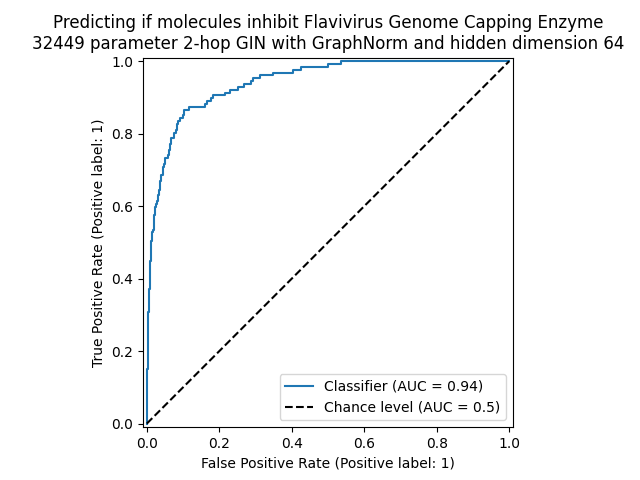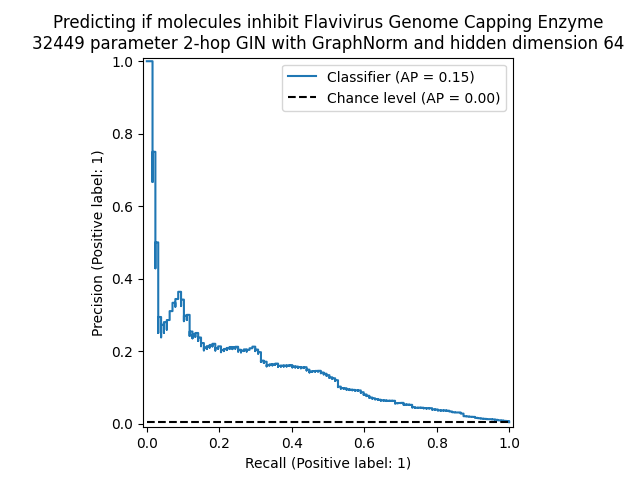

#### seed 1

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 1 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.143138

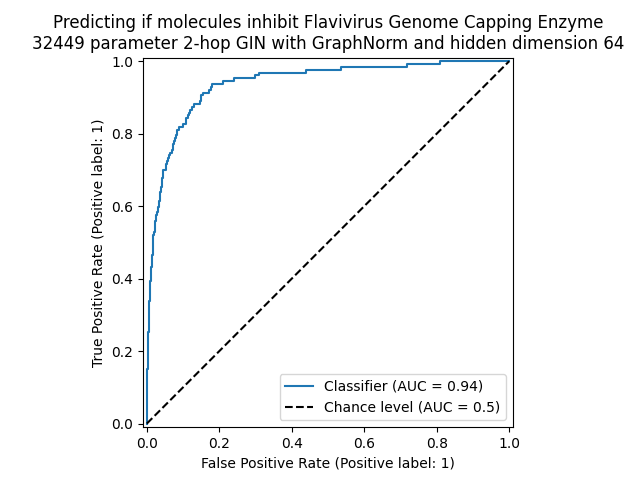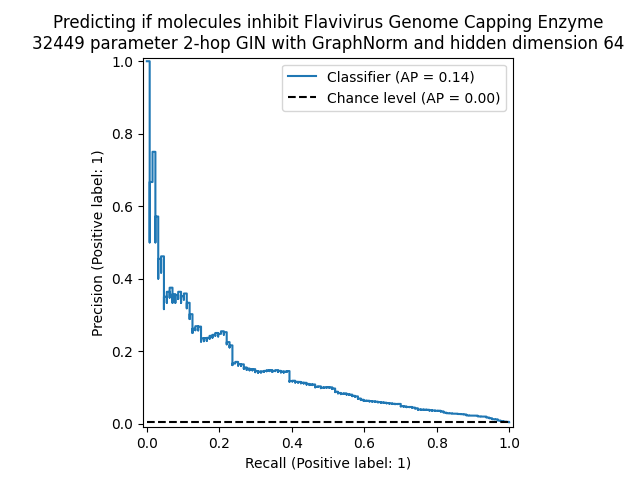

#### seed 2

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 2 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.135812

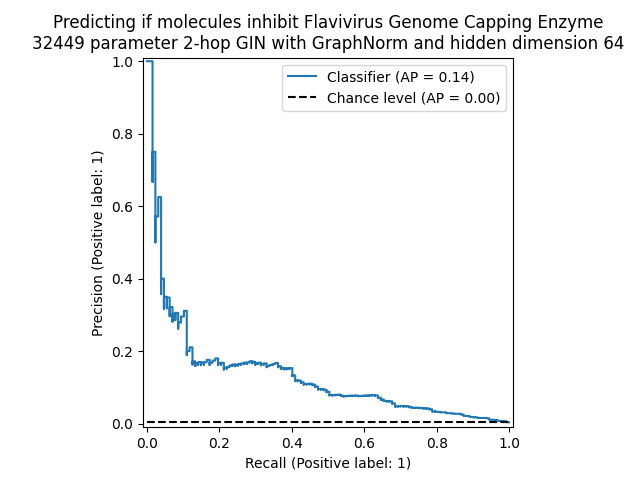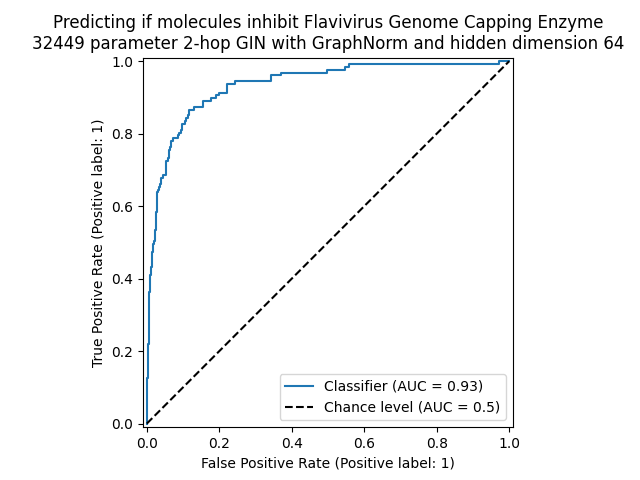

#### seed 3

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 3  --eval_on_test_set --use_scaffold_split --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.132330

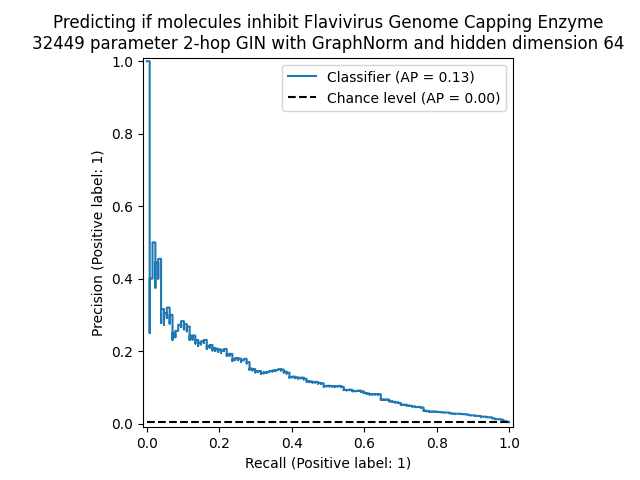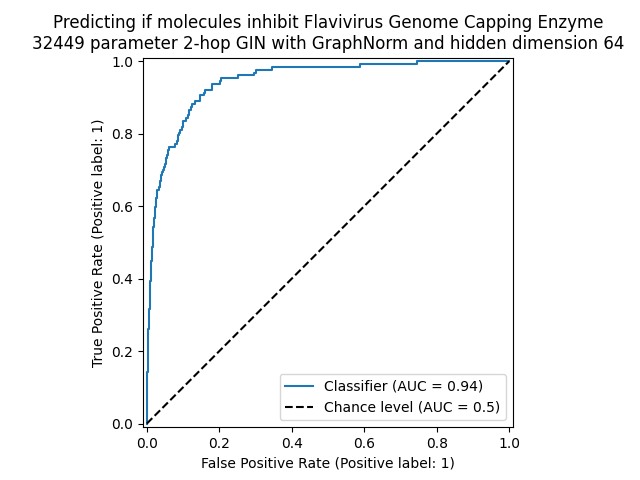

#### seed 4

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 4 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.136667

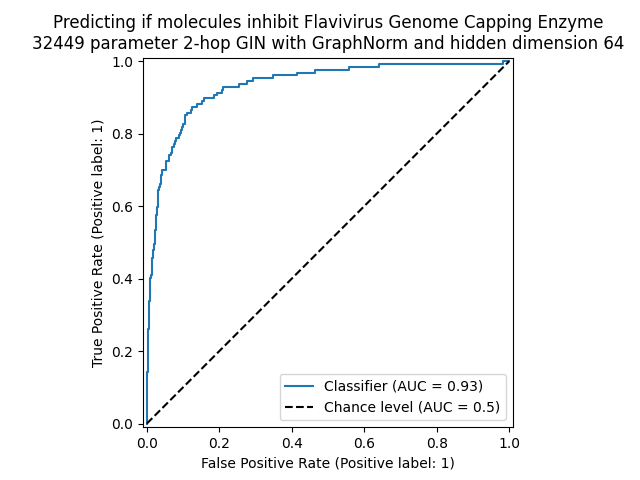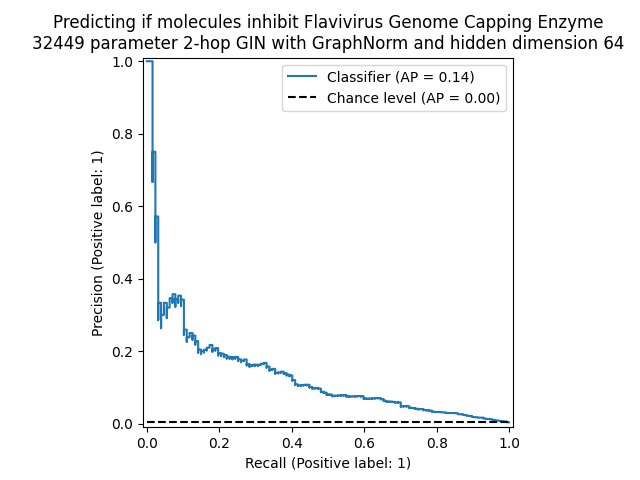

#### seed 5

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 5 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.125394

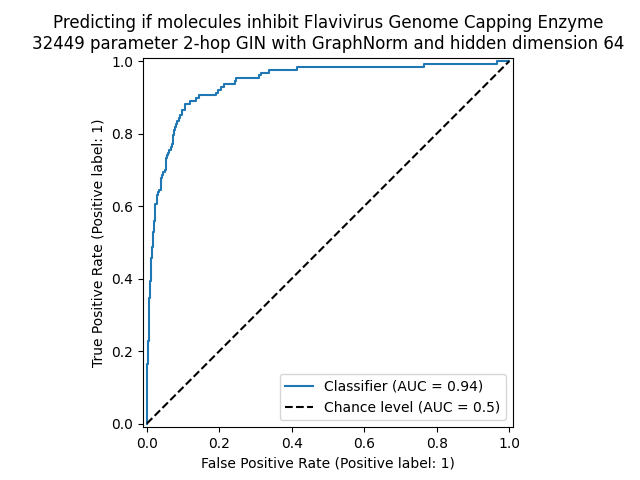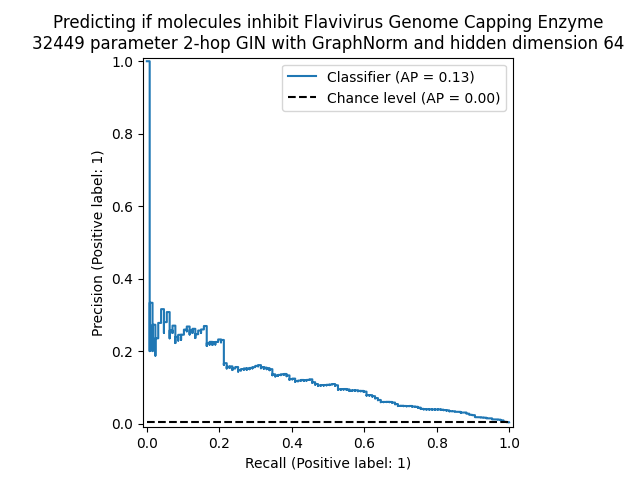

#### seed 6

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 6 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.140115

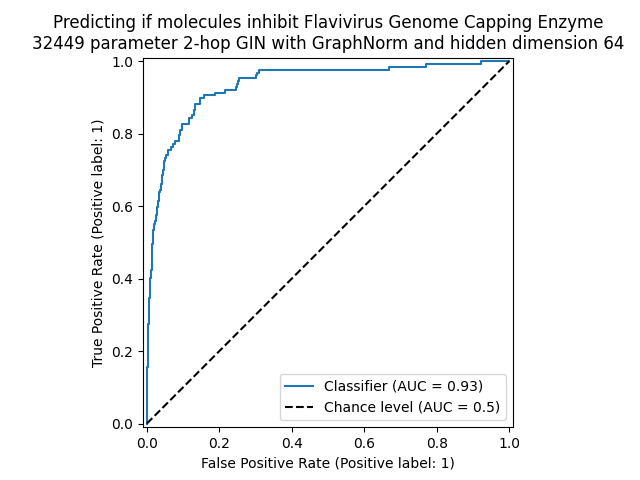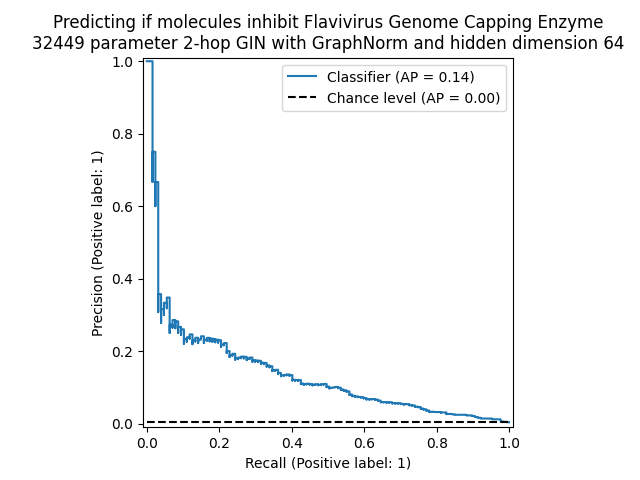

#### seed 7

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 7 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.140204

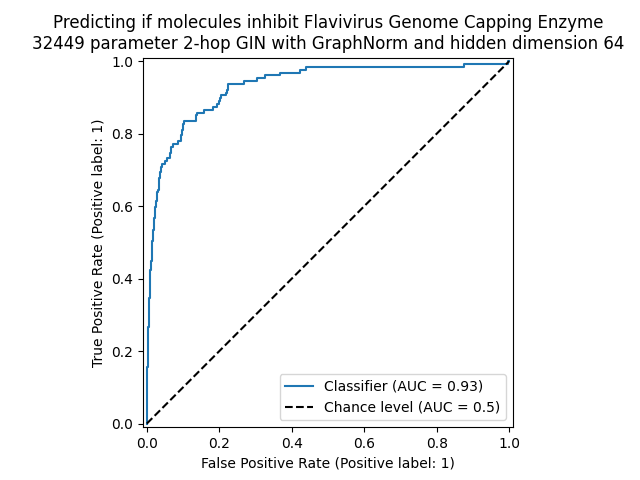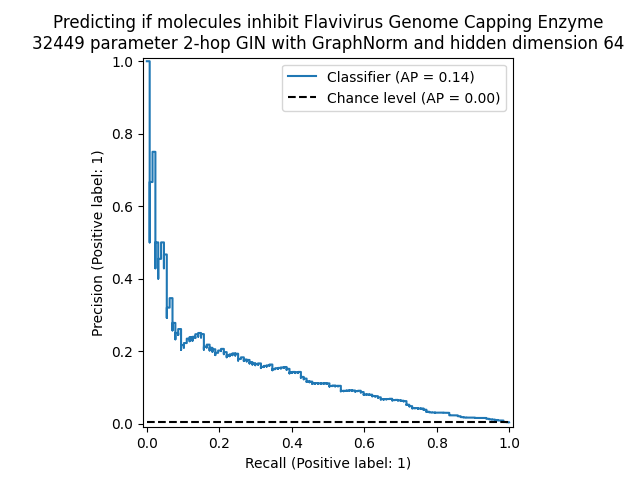

#### seed 8

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 8 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.153846

#### seed 9

In [ ]:
!python main_gin.py --aid_id 588689 --random_seed 9 --use_scaffold_split --eval_on_test_set --epochs 50 --hidden_dim 64 --weight_decay 1e-6 --batch_size 128

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/usr/local/lib/python3.11/dist-packages/ogb/graphproppred/dataset_pyg.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle da

Best model by validation ROCAUC had test AP: 0.137515

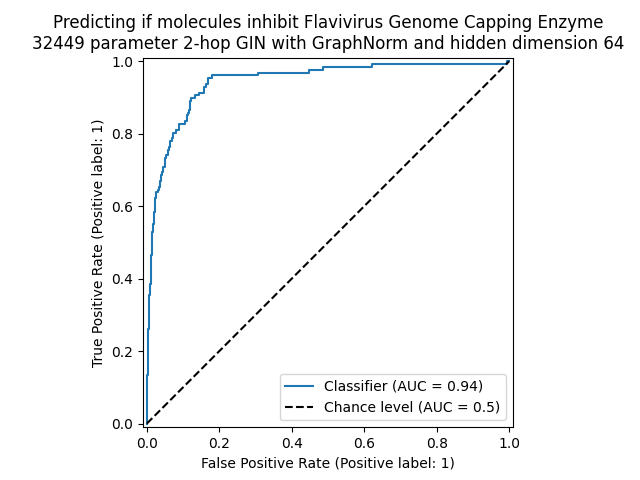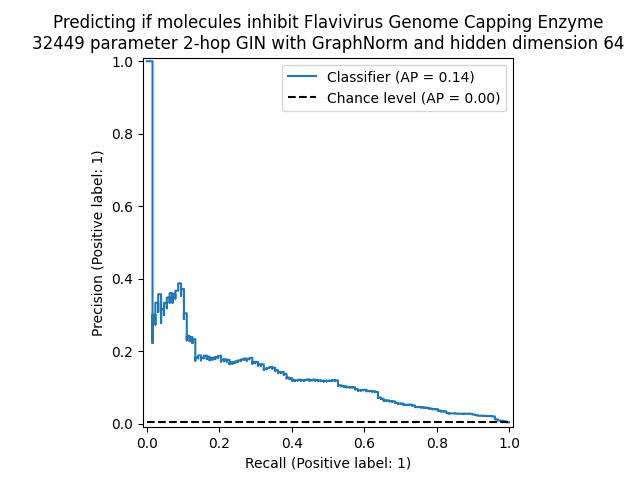

## Results

```
$ cat ~/Downloads/\[test_set_data]_tiny_GIN_for_WNV_train_validation_check_of_AID_588689_with_2_layer_64d_network_\(32K_params\),_50_epochs\;_no_gradient_clipping\;_SCAFFOLD_SPLIT_SMALL_BATCH_SIZE_\(128_instead_of_1024\).ipynb | grep 'Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was:'
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.942015\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.938349\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.933973\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.944732\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.933112\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.940169\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.934911\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.931274\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.939336\n",
            "Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was: 0.943453\n",
$ cat ~/Downloads/\[test_set_data]_tiny_GIN_for_WNV_train_validation_check_of_AID_588689_with_2_layer_64d_network_\(32K_params\),_50_epochs\;_no_gradient_clipping\;_SCAFFOLD_SPLIT_SMALL_BATCH_SIZE_\(128_instead_of_1024\).ipynb | grep 'Best model for ogbg-pcba-aid-588689 (eval metric rocauc) on the test set was:' | wc -l
10

>>> rocaucs = np.array([0.942015,0.938349,0.933973,0.944732,0.933112,0.940169,0.934911,0.931274,0.939336,0.943453])
>>> rocaucs.mean()
0.9381324000000001
>>> rocaucs.std()
0.004387499155555458
>>> rocaucs.mean() + rocaucs.std()/math.sqrt(len(rocaucs))*1.96
0.9408518001504698
>>> rocaucs.mean() - rocaucs.std()/math.sqrt(len(rocaucs))*1.96
0.9354129998495304
```

```
$ cat ~/Downloads/\[test_set_data]_tiny_GIN_for_WNV_train_validation_check_of_AID_588689_with_2_layer_64d_network_\(32K_params\),_50_epochs\;_no_gradient_clipping\;_SCAFFOLD_SPLIT_SMALL_BATCH_SIZE_\(128_instead_of_1024\).ipynb | grep 'Best model by validation ROCAUC had test AP:' | wc -l
10
$ cat ~/Downloads/\[test_set_data]_tiny_GIN_for_WNV_train_validation_check_of_AID_588689_with_2_layer_64d_network_\(32K_params\),_50_epochs\;_no_gradient_clipping\;_SCAFFOLD_SPLIT_SMALL_BATCH_SIZE_\(128_instead_of_1024\).ipynb | grep 'Best model by validation ROCAUC had test AP:'
        "Best model by validation ROCAUC had test AP: 0.149306"
        "Best model by validation ROCAUC had test AP: 0.143138"
        "Best model by validation ROCAUC had test AP: 0.135812"
        "Best model by validation ROCAUC had test AP: 0.132330"
        "Best model by validation ROCAUC had test AP: 0.136667"
        "Best model by validation ROCAUC had test AP: 0.125394"
        "Best model by validation ROCAUC had test AP: 0.140115"
        "Best model by validation ROCAUC had test AP: 0.140204"
        "Best model by validation ROCAUC had test AP: 0.153846"
        "Best model by validation ROCAUC had test AP: 0.137515"

>>> aps = np.array([0.149306,0.143138,0.135812,0.132330,0.136667,0.125394,0.140115,0.140204,0.153846,0.137515])
>>> aps.mean()
0.1394327
>>> aps.std()
0.007694053145774338
>>> aps.mean() + aps.std()/math.sqrt(len(aps))*1.96
0.14420152354628996
>>> aps.mean() - aps.std()/math.sqrt(len(aps))*1.96
0.13466387645371003
```

Test ROCAUC 93.8% +/- 0.4% (mean +/- std)

Test ROCAUC 95% confidence interval of sample mean (n=10) is 93.5% to 94.1%


Test AP 13.9 +/- 0.8% (mean +/- std)

Test AP 95% confidence interval of sample mean (n=10) is 13.5% to 14.4% .

Raw results files (not yet public but can be regenerated by copying and running this notebook in Google Colab) are in the Drive folder https://drive.google.com/drive/folders/1F9IVMNcDyzECjKj7h7Q_nCbyvSRtCa45 (dated 2025-01-21 through 2025-01-22 when this notebook's evaluation took place).

## OGB team baselines on same dataset for comparison

These are baselines from the recommended baseline models per OGB guidelines for baselines to run when proposing new datasets at https://docs.google.com/document/u/0/d/e/2PACX-1vS1hBTYLONRwAU9UxK42USTuRKrt_Yk4H0EhpLvJC_eOrGxbJUtrzDqlIStAFpnwZt2N28B3MuSxgqj/pub?pli=1 (from ogb.stanford.edu public links) which recommend using the baselines from their paper Hu, Weihua, et al. "Open graph benchmark: Datasets for machine learning on graphs." Advances in neural information processing systems 33 (2020): 22118-22133 ( https://arxiv.org/abs/2005.00687 ).

Note the document above is linked from the public ogb.stanford.edu "Dataset overview" page, subsection "Contributing Datasets" ( https://web.archive.org/web/20241220083832/https://ogb.stanford.edu/docs/dataset_overview/ ).

##### OGB Team GIN baseline (1,885,506 parameters) on PCBA AID 588689 "Flavivirus Genomic Capping Enzyme Inhibition"

https://colab.research.google.com/drive/18fwSQ4CzsDOZmcqUBlJc1S3ytvxxUwGt

(tiny GIN 32K statistically significantly beats OGB GIN 1.8M on ROCAUC and AP)





##### OGB Team GIN w/ virtual node baseline (3,336,606 parameters) on PCBA AID 588689 "Flavivirus Genomic Capping Enzyme Inhibition"

https://colab.research.google.com/drive/1fCrvEImy8FxB06pKd91NLMlnYAYJAY3y

(tiny GIN 32K statistically significantly beats OGB GIN w/ virtual node 3.3M on ROCAUC; beats on AP but may not be statistically significant)




##### OGB Team GCN baseline (528,001 parameters) on PCBA AID 588689 "Flavivirus Genomic Capping Enzyme Inhibition"

https://colab.research.google.com/drive/1QPyJK8Q7b6xxQaV8LIIcAw1p-xKNHD-w

(tiny GIN 32K parameter statistically significantly beats OGB GCN w/out virtual node 528K parameter on ROCAUC and AP)



##### OGB Team GCN w/ virtual node baseline (1,979,101 parameters) on PCBA AID 588689 "Flavivirus Genomic Capping Enzyme Inhibition"

https://colab.research.google.com/drive/1R16OFpIusMD5pBbmMQh0WZFHip6_XbIb

(tiny GIN 32K statistically significantly beats OGB GCN w/ virtual node 1.98M on ROCAUC; beats on AP but may not be statistically significant)